# Import Libraries

In [2]:
import pandas as pd
import numpy as np
#import tweepy as tp
import requests
import json
import re
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.reset_option('display.float_format')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
pd.set_option('display.max_columns', None)

# Gathering Data

#### 1- Enhanced Twitter Archive

In [3]:
twitter_archiver_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

#### 2- The Tweet Image Predictions File

In [6]:
#Downloading and saving the image prediction data from web page using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#Get the response object of the requests library
response = requests.get(url)

# GET the file name programmatically
# file_name = url.split('/')[-1]

#Write the file (tsv data)
if not os.path.isfile('image-predictions.tsv'):
    with open('image-predictions.tsv' , mode='wb') as file:
        file.write(response.content)

#Read the file (tsv data)
twitter_image_predictions = pd.read_csv('image-predictions.tsv' , sep='\t')

#### 3- Additional Data via the Twitter API

In [7]:
#create a new empty list
list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        list.append({'tweet_id':tweet_id,
                     'retweet_count': retweet_count,
                     'favorite_count': fav_count})
        
twitter_API = pd.DataFrame(list)

# OR
#list = []
#Write data from json text file from my file wrangle_act
#with open('tweet-json.txt', 'r') as file:
#    for li in file:
#        list.append(json.loads(li))
#create a new dataframe from list to assessing and cleaning data
#we need 3 important columns tweet_id, retweet_count and favorite_count only
#twitter_API = pd.DataFrame(list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
#convert dataframe file to csv file
#twitter_API_data.to_csv('twitter_API_data.csv', index=False)

# Assessing Data

#### We Have 3 Files
    1- twitter_archiver_enhanced
    2- twitter_image_predictions
    3- twitter_API

#### 1- twitter_archiver_enhanced_data

In [8]:
twitter_archiver_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [9]:
twitter_archiver_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [10]:
twitter_archiver_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
894,759197388317847553,NaN,NaN,2016-07-30 01:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Luna. She's just heckin precious af I have nothing else to say. 12/10 https://t.co/gQH2mmKIJW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twitter.com/dog_rates/status/759197388317847553/photo/1",12,10,Luna,None,None,None,None
1985,672898206762672129,NaN,NaN,2015-12-04 22:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cheryl AKA Queen Pupper of the Skies. Experienced fighter pilot. Much skill. True hero. 11/10 https://t.co/i4XJEWwdsp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672898206762672129/photo/1,11,10,Cheryl,None,None,pupper,None
1468,694206574471057408,NaN,NaN,2016-02-01 17:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Martha come take a look at this. I'm so fed up with the media's unrealistic portrayal of dogs these days."" 10/10 https://t.co/Sd4qAdSRqI",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694206574471057408/photo/1,10,10,None,None,None,None,None
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10 https://t.co/eSvz4EapHH,7.652221e+17,4.196984e+09,2016-08-15 16:22:20 +0000,"https://twitter.com/dog_rates/status/765222098633691136/photo/1,https://twitter.com/dog_rates/status/765222098633691136/photo/1",10,10,Gromit,None,None,None,None
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maisey. She fell asleep mid-excavation. Happens to the best of us. 13/10 would pat noggin approvingly https://t.co/tp1kQ8i9JF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943205470208/photo/1,13,10,Maisey,None,None,None,None
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet BeBe. She rocks the messy bun of your dreams. H*ckin flawless. 12/10 would watch her tutorial https://t.co/of0pFNBIl8,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792394556390137856/photo/1,https://twitter.com/dog_rates/status/792394556390137856/photo/1",12,10,BeBe,None,None,None,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843873095681/photo/1,12,10,Sadie,None,None,None,None
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Oliver. He's pretty exotic. Fairly pupset as well. Too many midterms coming pup. 11/10 would pet with extreme caution https://t.co/fGAPAsxjKs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/836677758902222849/photo/1,https://twitter.com/dog_rates/status/836677758902222849/photo/1",11,10,Oliver,None,None,None,None
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy New Year from your fav holiday squad! 🎉 12/10 for all\n\nHere's to a pupper-filled year 🍻🐶🐶🐶 https://t.co/ZSdEj59FGf,NaN,NaN,NaN,https:

In [11]:
twitter_archiver_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Name Columns

In [12]:
# The lengths of the names in name column
name_length = twitter_archiver_enhanced['name'].str.len()

# Number of lengths of the names less than 3
len( twitter_archiver_enhanced[name_length < 3] )

79

In [13]:
# The lengths of the names less than 3
twitter_archiver_enhanced[name_length < 3].name.value_counts()

a     55
Bo     9
an     7
my     1
by     1
Jo     1
O      1
JD     1
Mo     1
Ed     1
Al     1
Name: name, dtype: int64

In [14]:
# The lengths of the names less than 3 and lowercase
for index, row in twitter_archiver_enhanced.iterrows():  
    if len(row['name']) < 3 and row['name'][0].islower():
        print(row['name'])

a
a
an
a
my
a
a
a
an
a
a
a
a
a
a
an
a
a
a
by
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
an
a
a
a
a
a
a
a
a
a
a
a
a
a
an
a
an
a
a
an
a
a
a
a


In [15]:
# The lengths of the names more than 3 and lowercase
for index, row in twitter_archiver_enhanced.iterrows():  
    if len(row['name']) > 3 and row['name'][0].islower():
        print(row['name'])

such
quite
quite
quite
incredibly
very
very
just
very
actually
just
getting
very
this
unacceptable
infuriating
very
getting
just
actually
officially
life
light
just
space
quite


In [16]:
# Print Details
"""
count = 0
for index, row in df_archiver_clean.iterrows():  
    if len(row['name']) < 3 and row['name'][0].islower():
        print(row['name'])
        count += 1
print('\nTotal = ' , count)
"""

"\ncount = 0\nfor index, row in df_archiver_clean.iterrows():  \n    if len(row['name']) < 3 and row['name'][0].islower():\n        print(row['name'])\n        count += 1\nprint('\nTotal = ' , count)\n"

- Rating Dnominator Column

In [17]:
twitter_archiver_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [18]:
# The number of denominator ratings more than 10
len(twitter_archiver_enhanced[twitter_archiver_enhanced['rating_denominator'] > 10])

20

In [19]:
# denominator ratings more than 10
twitter_archiver_enhanced[twitter_archiver_enhanced['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

In [20]:
# denominator ratings more than 40
twitter_archiver_enhanced[twitter_archiver_enhanced.rating_denominator > 40]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt

In [21]:
# denominator ratings equal 170
twitter_archiver_enhanced[twitter_archiver_enhanced.rating_denominator == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


View some tweets that denominator ratings more than 40
- rating_denominator = 170 https://twitter.com/dog_rates/status/731156023742988288/photo/1
- rating_denominator = 120 https://twitter.com/dog_rates/status/677716515794329600/photo/1
- rating_denominator = 50 https://twitter.com/dog_rates/status/704054845121142784/photo/1

In [22]:
# denominator ratings more than 10 and less than 40
twitter_archiver_enhanced[(twitter_archiver_enhanced.rating_denominator > 10) & (twitter_archiver_enhanced.rating_denominator < 40)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


In [23]:
# The number of denominator ratings less than 10
len(twitter_archiver_enhanced[twitter_archiver_enhanced['rating_denominator'] < 10])

3

In [24]:
# denominator ratings less than 10
twitter_archiver_enhanced[twitter_archiver_enhanced['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


- Rating Numerator Column

In [25]:
twitter_archiver_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [26]:
twitter_archiver_enhanced['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [27]:
# The number of denominator ratings more than 15
len(twitter_archiver_enhanced[twitter_archiver_enhanced['rating_numerator'] > 15])

26

In [28]:
twitter_archiver_enhanced[twitter_archiver_enhanced.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


- Display URL image for this is id
- Url = https://twitter.com/dog_rates/status/670842764863651840/photo/1	

In [29]:
# The number of denominator ratings less than 10
len(twitter_archiver_enhanced[twitter_archiver_enhanced['rating_numerator'] < 10])

440

In [30]:
# The number of denominator ratings less than 6
len(twitter_archiver_enhanced[twitter_archiver_enhanced['rating_numerator'] < 6])

93

In [31]:
twitter_archiver_enhanced[twitter_archiver_enhanced['rating_numerator'] < 6].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2013,672231046314901505,NaN,NaN,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672231046314901505/photo/1,5,10,None,None,None,None,None
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog resembles a baked potato. Bed looks uncomfortable. No tail. Comes with butter tho. 3/10 petting still fun https://t.co/x89NSCEZCq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095915278337/photo/1,3,10,None,None,None,None,None
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tommy. He's a cool dog. Hard not to step on. Won't let go of seashell. Not fast by any means. 3/10 https://t.co/0gY6XTOpn3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038660800512/photo/1,3,10,Tommy,None,None,None,None


#### Some random tweets with a rating of less than 6
- https://twitter.com/dog_rates/status/673906403526995968/photo/1 , It is a cat that is not a dog
- https://twitter.com/dog_rates/status/670826280409919488/photo/1 , It's a crab, not a dog
- https://twitter.com/dog_rates/status/667911425562669056/photo/1 , Not a dog

#### 2-twitter_image_predictions

In [32]:
twitter_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [33]:
twitter_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
twitter_image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [35]:
twitter_image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [36]:
# Create dataframe 'df_False' that contains the values in 3 column (p1_dog, p2_dog, p3_dog) = False
df_False = twitter_image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False')
#df_False.p1_dog.value_counts()

In [37]:
df_False.p1_dog.value_counts()

False    324
Name: p1_dog, dtype: int64

In [38]:
df_False.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False


#### Some random image that contain False into the three columns (p1_dog, p2_dog, p3_dog)
- https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg	
- https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg	
- https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg

## Quality Issues
#### `twitter_archiver_enhanced` 
- Droping rows without images

- Droping rows containing retweets, and then droping the three columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

- Droping rows containing replys, and then droping the two columns (in_reply_to_status_id, in_reply_to_user_id)

- tweet_id is a float not a string

- timestamp is a string not datetime

- Last four columns(doggo floofer,pupper,puppo) change the value 'None' to ' '

- Name column, Some names are wrong and some are names with less than 3 letters and lowercase (a, an, by,my)

- Name column, Some names are wrong and some are names with more than 3 letters and lowercase (just, very,...)

- Name column, After cleaning up the previous two problems, I discovered one wrong names (of) in row 1708

- Rating Numerator column, Some values contain fractions and are not noted correctly

- Rating Denominator column, Rating value equal to 40 or more, its image contains more than one dog in the image

- Rating Denominator column, The denominators rating are more than 10 and less than 40

- Rating Denominator column, The denominators rating are less than 10

- Rating Numerator column, Some of the numerators are more than 15

- Rating Numerator column, Drop the numerator values less than 6

- Dog_stage column, Replace 3 values (doggopuppo, doggopupper, and doggofloofer) with readable values
  (doggo puppo, doggo pupper, doggo floofer).


#### `twitter_image_predictions`
- Droping rows containing retweets based on df_archiver_clean dataframe

- Droping rows containing replys based on df_archiver_clean dataframe

- Ensure that all of the rows contain images

- Drop rows that contain breed equal to False

- Rename column names (p, p_conf, p_dog) to names with an understandable meaning


#### `twitter_API`
- Droping rows containing retweets

- Droping rows containing replys


## Tidiness Issues
- In `twitter_archiver_enhanced` file, Create a new column named 'dog_stage' that contains the values from the last four columns (doggo, floofer, pupper, and puppo) and then drop these columns.

- Merging the three Dataframes (twitter_archiver_enhanced, twitter_image_predictions, twitter_API) into one Dataframe



# Clean

In [40]:
# Copies the 3 dataframe

df_archiver = twitter_archiver_enhanced.copy()
df_image = twitter_image_predictions.copy()
df_api = twitter_API.copy()

## Quality Issues

1- Drpping df_archiver dataframe rows without images

##### Define
Create a new list containing photos from twitter_image_predities using a function `tolist()`, then clean up the df_archiver from the rows without images, based on this list that you created.

##### Code

In [41]:
len(df_archiver.tweet_id)

2356

In [42]:
# creating a new list of tweet_ids with images from twitter_image_predictions
tweets_with_image = twitter_image_predictions['tweet_id'].unique().tolist()
len(tweets_with_image)

2075

In [43]:
# check that all the tweets with images exist in the df_archiver_clean data
len(tweets_with_image) == df_archiver.tweet_id.isin(tweets_with_image).sum()

True

In [44]:
# Cleaning tweet_id in df_archiver data
df_archiver = df_archiver[df_archiver.tweet_id.isin(tweets_with_image)]

##### Test

In [45]:
len(df_archiver.tweet_id)

2075

2- Droping df_archiver dataframe rows containing retweets, and then droping the two columns (retweeted_status_id, retweeted_status_user_id)

##### Define
- based on In the original archive data to extract the tweets from the retweet_status_id colunm using a function `.notnull()`, than dropping the retweets from the df_archiver data.
- And Dropping the three columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) using a function `drop()`

##### Code

In [46]:
len(df_archiver.tweet_id)

2075

In [47]:
df_archiver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [48]:
# In the original archive data to extract the tweets that include data in the retweet_status_id colunm.
retweet = twitter_archiver_enhanced.retweeted_status_id.notnull()
df_archiver[retweet].shape[0]

81

In [49]:
# Dropping the retweets from the df_archiver_clean data
df_archiver = df_archiver[~retweet]

In [50]:
# Droping the two columns (retweeted_status_id, retweeted_status_user_id)
df_archiver.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test

In [51]:
len(df_archiver.tweet_id)

1994

In [52]:
df_archiver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ 

3- Droping df_archiver dataframe rows containing replys, and then droping the two columns (in_reply_to_status_id, in_reply_to_user_id)

##### Define
- based on In the original archive data to extract the replies from the in_reply_to_status_id colunm using a function `.notnull()`, than dropping the replies from the df_archiver data.
- And Dropping the two columns (in_reply_to_status_id, in_reply_to_user_id) using a function `drop()`

##### Code

In [53]:
len(df_archiver.tweet_id)

1994

In [54]:
df_archiver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ 

In [55]:
# in the original archive data to extract the tweets that include data in the in_reply_to_status_id colunm.
reply = twitter_archiver_enhanced.in_reply_to_status_id.notnull()
df_archiver[reply].shape[0]

23

In [56]:
# Dropping the replys from the df_archiver_clean data
df_archiver = df_archiver[~reply]

In [57]:
len(df_archiver.in_reply_to_status_id)

1971

In [58]:
# Droping the two columns (retweeted_status_id, retweeted_status_user_id)
df_archiver.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

##### Test

In [59]:
len(df_archiver.tweet_id)

1971

In [60]:
df_archiver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


2- Droping df_image dataframe rows containing retweets from df_image dataframe based on df_archiver_clean dataframe

##### Define
I will dropping the rows containing the retweet by the ids in the df_archiver dataframe, that create a list that contains the IDs in the df_archiver dataframe, then compare them with wrapping the df_image dataframe and delete the ones that do not match the current in the list using a function `logical_not()`

##### Code

In [61]:
# check the number of rows tweet_id in df_image table for extra tweet ids not in the df_archiver table
#np.logical_not(df_image.tweet_id.isin(df_archiver.tweet_id.to_list()))

# OR use this --> len(df_image.tweet_id)
len(df_image.tweet_id)

2075

In [62]:
# Dropping the retweets and replies ids from the df_image_clean dataframe
drop = df_image.tweet_id.isin(df_archiver.tweet_id).to_list()
df_image = df_image[~np.logical_not(drop)]

##### Test

In [63]:
len(df_image.tweet_id)

1971

3- Droping df_api dataframe rows containing retweets from df_api dataframe based on df_archiver_clean dataframe

##### Define
I will dropping the rows containing the retweet by the ids in the df_archiver dataframe, that create a list that contains the IDs in the df_archiver dataframe, then compare them with wrapping the df_api dataframe and delete the ones that do not match the current in the list using a function `logical_not()`

##### Code

In [64]:
# check the number of rows tweet_id in df_api table for extra tweet ids not in the df_archiver table
#np.logical_not(df_api.tweet_id.isin(df_archiver.tweet_id.to_list()))

# OR use this --> len(df_api.tweet_id)
len(df_api.tweet_id)

2354

In [65]:
# Dropping the retweets and replies ids from the df_api dataframe
drop = df_api.tweet_id.isin(df_archiver.tweet_id).to_list()
df_api = df_api[~np.logical_not(drop)]

##### Test

In [66]:
len(df_api.tweet_id)

1971

## Tidiness Issues

1- In twitter_archiver_enhanced file, Create a new column named 'dog_stage' that contains the values from the last four columns (doggo, floofer, pupper, and puppo) and then drop these columns.

##### Define
Create a new column named 'dog_stage' that contains the values from the last four columns
- Replace the “None” string in the last four columns with empty string "" using a function `replace()`
- Add the four columns together to form a one new column named 'dog_stage' using a pandas operation
- Than drop the old four columns using a function `drop()`
- Replace the empty string to NaN
- Editing some entries that have two stages separated by hyphen for ease of reading.

##### Code

In [67]:
# Replace the “None” string in the last four columns with empty string "" 

df_archiver.iloc[:, -4:] = df_archiver.iloc[:, -4:].replace('None','')

In [68]:
# Then Add the four columns together to form a one new column named 'dog_stage'

df_archiver['dog_stage'] = df_archiver.doggo + df_archiver.floofer + df_archiver.pupper + df_archiver.puppo

In [69]:
# Drop the old four columns

df_archiver.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

In [70]:
# Now you have Inconsistent representation of null values as '' empty-strings in the ( dog_stage ) column
# and some entries have two stages that you can separate by a hyphen for readability.
# Replace the empty string to np.nan

df_archiver.loc[df_archiver.dog_stage == "", 'dog_stage'] = np.nan

In [71]:
# for each row which has two stages, for example doggopupper assign it manually to doggo-pupper

df_archiver.loc[df_archiver.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
df_archiver.loc[df_archiver.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
df_archiver.loc[df_archiver.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

In [72]:
# OR

"""
# combine (doggo, floofer, pupper, puppo) under dog breed column
df_archiver_clean.doggo = df_archiver_clean.doggo.str.replace('None' ,'')
df_archiver_clean.floofer = df_archiver_clean.floofer.str.replace('None' ,'')
df_archiver_clean.pupper = df_archiver_clean.pupper.str.replace('None' ,'')
df_archiver_clean.puppo = df_archiver_clean.puppo.str.replace('None' ,'')

df_archiver_clean['dog_stage'] = df_archiver_clean['doggo'] + df_archiver_clean['floofer'] + df_archiver_clean['pupper'] + df_archiver_clean['puppo']

df_archiver_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

df_archiver_clean.loc[df_archiver_clean.dog_stage == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
df_archiver_clean.loc[df_archiver_clean.dog_stage == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
df_archiver_clean.loc[df_archiver_clean.dog_stage == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'

# OR
df_archive_clean['dog_stage'] = archive_clean.dog_stage.map({'doggopupper': 'doggo-pupper', 'doggopuppo': 'doggo-puppo', 'doggofloofer': 'doggo-floofer'})

"""

"\n# combine (doggo, floofer, pupper, puppo) under dog breed column\ndf_archiver_clean.doggo = df_archiver_clean.doggo.str.replace('None' ,'')\ndf_archiver_clean.floofer = df_archiver_clean.floofer.str.replace('None' ,'')\ndf_archiver_clean.pupper = df_archiver_clean.pupper.str.replace('None' ,'')\ndf_archiver_clean.puppo = df_archiver_clean.puppo.str.replace('None' ,'')\n\ndf_archiver_clean['dog_stage'] = df_archiver_clean['doggo'] + df_archiver_clean['floofer'] + df_archiver_clean['pupper'] + df_archiver_clean['puppo']\n\ndf_archiver_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)\n\ndf_archiver_clean.loc[df_archiver_clean.dog_stage == 'doggopupper', 'dog_breed'] = 'doggo-pupper'\ndf_archiver_clean.loc[df_archiver_clean.dog_stage == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'\ndf_archiver_clean.loc[df_archiver_clean.dog_stage == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'\n\n# OR\ndf_archive_clean['dog_stage'] = archive_clean.dog_stage.map({'doggopupper'

##### Test

In [73]:
df_archiver.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN


In [74]:
df_archiver.dog_stage.value_counts(dropna = False)

NaN              1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

2- Merging the three Dataframes (twitter_archiver_enhanced, twitter_image_predictions, twitter_API) into one Dataframe

##### Define
Merging the twitter_API, twitter_image_predictions and twitter_API Dataframe into the one Dataframe, Because the twitter_API and twitter_image_predictions are not considered the main Dataframe to be relied upon for analysis, But it is considered to add attributes to the twitter_archiver_enhanced original Dataframe using a function `marge()`

##### Code

In [75]:
df_archiver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   dog_stage           303 non-null    object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


In [76]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [77]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1971 non-null   int64
 1   retweet_count   1971 non-null   int64
 2   favorite_count  1971 non-null   int64
dtypes: int64(3)
memory usage: 61.6 KB


In [78]:
# merge df_archiver and df_api dataframe
df_clean = pd.merge(df_archiver, df_api, on = 'tweet_id', how ='left')

# OR
# df_archiver = df_archiver.merge(df_api, on = 'tweet_id', how ='left')

In [79]:
# merge df_archiver and df_image dataframe
df_clean = pd.merge(df_clean, df_image, on = 'tweet_id', how ='left')

# OR
# df_archiver = df_archiver.merge(df_image, on = 'tweet_id', how ='left')

##### Test

In [80]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   dog_stage           303 non-null    object 
 9   retweet_count       1971 non-null   int64  
 10  favorite_count      1971 non-null   int64  
 11  jpg_url             1971 non-null   object 
 12  img_num             1971 non-null   int64  
 13  p1                  1971 non-null   object 
 14  p1_conf             1971 non-null   float64
 15  p1_dog              1971 non-null   bool   
 16  p2    

### Now, we have one dataframe that contains all three dataframes without Retweets and Replies
- df_clean

## Quality Issues

In [82]:
df = df_clean.copy()

In [83]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,NaN,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look

1- Name column, Some names are wrong and some are names with less than 3 letters and lowercase (a, an, by,my)

2- Name column, Some names are wrong and some are names with more than 3 letters and lowercase (just, very,...)

##### Define
Use a pattern to extract the correct dog's name from the 'text' columnو Using a number of functions like `.islower()`, `.iterrows()`, `.loc()`, `.replace()`, `.fillna`

##### Code

In [84]:
# The lengths of the names
name_lenght = df['name'].str.len()

# Number of lengths of the names less than 3
len( df[name_lenght < 3] )

75

In [85]:
# The lengths of the names less than 3
df[name_lenght < 3].name.value_counts()

a     55
Bo     6
an     6
my     1
by     1
Jo     1
O      1
JD     1
Mo     1
Ed     1
Al     1
Name: name, dtype: int64

In [86]:
len(df[df['name'].str[0].str.islower().fillna(False)])

98

In [87]:
# The number of names that contain less than 3 letters and lowercase
c = 0
for index, row in df.iterrows():  
    if len(row['name']) < 3 and row['name'][0].islower():
        c += 1
c

63

In [88]:
# The number of names that contain more than 3 letters and lowercase
c = 0
for index, row in df.iterrows():  
    if len(row['name']) > 3 and row['name'][0].islower():
        c += 1
c

21

In [89]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')

for index, row in df.iterrows():
    if len(row['name']) < 3 and row['name'][0].islower():
        try:
            c_name = re.findall(pattern, row['text'])[0]
            df.loc[index,'name'] = df.loc[index,'name'].replace(row['name'], c_name)
        except IndexError:
            df.loc[index,'name'] = np.nan
    
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            cc_name = re.findall(pattern_2, row['text'])[0]
            df.loc[index,'name'] = df.loc[index,'name'].replace(row['name'], cc_name)
        except IndexError:
            df.loc[index,'name'] = np.nan

In [90]:
df[df['name'].str[0].str.islower().fillna(False) < 3]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just loo

##### Test

In [91]:
df.name.value_counts(dropna = False)

NaN        592
Charlie     11
Lucy        10
Oliver      10
Cooper      10
          ... 
William      1
Clarq        1
Godi         1
Maya         1
Dixie        1
Name: name, Length: 938, dtype: int64

In [92]:
# The lengths of the names less than 3
df[df['name'].str.len() < 3].name.value_counts()

Bo    6
JD    1
Jo    1
O     1
Mo    1
Al    1
Ed    1
of    1
Name: name, dtype: int64

In [93]:
df[df['name'].str[0].str.islower().fillna(False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1708,670803562457407488,2015-11-29 03:16:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR,https://twitter.com/dog_rates/status/670803562457407488/photo/1,10,10,of,NaN,95,362,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True


3- Name column, After cleaning up the previous two problems, I discovered one wrong names (of) in row 1708

##### Define
We'll manually replace the last false value with the `.loc()` function based on number of row, to have all values in the column clean

##### Code

In [94]:
len(df[df['name'].str[0].str.islower().fillna(False)])

1

In [95]:
df[df['name'].str[0].str.islower().fillna(False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1708,670803562457407488,2015-11-29 03:16:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR,https://twitter.com/dog_rates/status/670803562457407488/photo/1,10,10,of,NaN,95,362,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True


In [96]:
# in row 1708
df.loc[1708, ['name']]  = 'Dog'

##### Test

In [97]:
len(df[df['name'].str[0].str.islower().fillna(False)])

0

- Raitng

##### In the raiting I will follow the following steps:
- Re-extract the evaluation for the numerator from the speech column because some evaluations contain fractions and are not extracted correctly
- Cleaning up the wrong values in the denominator column
- Go back to the numerator again and clean up the wrong values as you did with the numerator

4- Rating Numerator column, Some values contain fractions and are not noted correctly

##### Define
Re-extract the raiting of all numerator values from the text column, using the function `extract()`

##### Code

In [98]:
# Before
df['rating_numerator'].value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
165       1
99        1
121       1
144       1
0         1
204       1
420       1
84        1
88        1
26        1
80        1
75        1
60        1
50        1
45        1
44        1
27        1
24        1
1776      1
Name: rating_numerator, dtype: int64

In [99]:
# Check random value (before)
df[df.tweet_id == 786709082849828864]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
499,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [100]:
# Extract the numerator which may be in the form of integer or float

df['rating_numerator'] = df.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

# OR
#for index,row in df_archiver_clean.iterrows():
#    if row['rating_numerator'] > 15 :
#        new = row.text.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
#        df_archiver_clean.loc[index, 'rating_numerator'] = new

##### Test

In [101]:
# After
df['rating_numerator'].value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
88.00        1
80.00        1
24.00        1
165.00       1
144.00       1
420.00       1
11.27        1
13.50        1
121.00       1
11.26        1
1776.00      1
50.00        1
204.00       1
45.00        1
44.00        1
9.75         1
84.00        1
99.00        1
0.00         1
Name: rating_numerator, dtype: int64

In [102]:
# Check random value (after)
df[df.tweet_id == 786709082849828864]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
499,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


- Cleaning up the wrong values in the denominator column

5- Rating Denominator column, Rating value equal to 40 or more, its image contains more than one dog in the image

##### Define
Values equal to 40 or more in the denominator column, I will adjust the value in the numerator and denominator
- Create a variable called a dogs_count = raiting of the denominator for the row / 10
- Change in numerator value = old value / dogs_count
- Change in denominator value = 10

##### Code

In [103]:
len(df[df['rating_denominator'] > 39])

12

In [104]:
df[df['rating_denominator'] > 39]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70,NaN,NaN,3716,13518,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
658,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,NaN,NaN,2539,5316,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
842,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170,NaN,NaN,1434,4196,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
918,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50,Bluebert,NaN,247,2574,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
939,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90,NaN,NaN,829,3062,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
963,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80,NaN,NaN,636,2529,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
981,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,NaN,NaN,721,2634,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1045,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50,NaN,NaN,10

In [105]:
# Check random value (before)
df[df.rating_denominator == 170]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
842,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170,NaN,NaN,1434,4196,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False


In [106]:
for index,row in df.iterrows():
    if row['rating_denominator'] > 39:
        # Calculating the number of dogs in the tweets featuring many dogs
        dogs_count = df.rating_denominator[index]/10
        
        # Performing the Calculations
        df.rating_numerator[index] = df.rating_numerator[index]/dogs_count
        df.rating_denominator[index] = 10

# OR
# Calculating the dogs counts in the tweets featuring many dogs
#dogs_count = df. rating_denominator[The rows in which the `rating_numerator >= 40` ]/10

# Check the dog_count with their indices:
#print(dog_count)

# Performing the Calculations
#df.loc[df.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [df.rating_numerator[df.rating_numerator >= 40]/dogs_count , 10]


##### Test

In [107]:
len(df[df['rating_denominator'] > 39])

0

In [108]:
# Check random value (after)
df[df.tweet_id == 731156023742988288]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
842,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,12.0,10,NaN,NaN,1434,4196,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False


6- Rating Denominator column, The denominators rating are more than 10 and less than 40

##### Define
After cleaning the values greater than 40, we are left with three values greater than 10  its number equals 3 wrong rating, which are manually adjusted using `.loc()` function based on number of row

##### Code

In [109]:
df[df['rating_denominator'] > 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
794,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11,NaN,NaN,9220,20648,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
884,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20,NaN,NaN,1764,4493,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1313,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,11,Darrel,NaN,15043,26239,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [110]:
#We have 3 rows left that we will manually adjust from the 'text' column

# in row 794
df.loc[794, ['rating_numerator', 'rating_denominator']]  = 14, 10

In [111]:
# in row 884
df.loc[884, ['rating_numerator', 'rating_denominator']]  = 13, 10

In [112]:
# in row 1313
df.loc[1313, ['rating_numerator', 'rating_denominator']]  = 10, 10

##### Test

In [113]:
len(df[df['rating_denominator'] > 10])

0

7- Rating Denominator column, The denominators rating are less than 10

##### Define
There are false values less than 10 that have to be manually adjusted  its number equals tow wrong rating using `.loc()` function based on number of row

##### Code

In [114]:
df[df['rating_denominator'] < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,NaN,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
1950,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2,NaN,NaN,71,152,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [115]:
# in row 382
df.loc[382, ['rating_numerator', 'rating_denominator']]  = np.nan, np.nan

In [116]:
# in row 1950
df.loc[1950, ['rating_numerator', 'rating_denominator']]  = 9, 10

##### Test

In [117]:
len(df[df['rating_denominator'] < 10])

0

In [118]:
df['rating_denominator'].value_counts()

10.0    1970
Name: rating_denominator, dtype: int64

- Cleaning up the wrong values in the numinator column

8- Rating Numerator column, Some of the numerators are more than 15

##### Define
There are false values, more than 15 raiting values that must be modified, and there are two of them, and one of them contains a human image that will be deleted using function `drop()`

##### Code

In [119]:
df['rating_numerator'].value_counts()

12.00      450
10.00      420
11.00      397
13.00      254
9.00       151
8.00        95
7.00        51
14.00       34
5.00        32
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
11.26        1
9.75         1
1776.00      1
420.00       1
13.50        1
11.27        1
0.00         1
Name: rating_numerator, dtype: int64

In [120]:
len(df[df['rating_numerator'] > 15])

2

In [121]:
df[df['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
722,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,2772,5569,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1696,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,NaN,NaN,4324,7989,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [122]:
# in row 1696
df.drop([1696], inplace = True)

##### Test

In [123]:
df[df.tweet_id == 670842764863651840]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [124]:
df[df['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
722,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,2772,5569,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


9- Rating Numerator column, Drop the numerator values less than 6

##### Define
After taking a random sample from the numerator values of less than 5, many of them or they may all do not contain pictures of speech, so they will be dropped by using the function `drop()`

##### Code

In [125]:
len(df[df['rating_numerator'] < 6])

80

In [126]:
df[df['rating_numerator'] < 6]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
232,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,NaN,NaN,3443,24574,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True
526,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5.0,10.0,NaN,NaN,3129,11634,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
550,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10.0,Wesley,NaN,1893,7078,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
644,760252756032651264,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4.0,10.0,Fido,NaN,995,4338,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
665,757596066325864448,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4.0,10.0,NaN,NaN,1219,4808,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,666411507551481857,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2.0,10.0,NaN,NaN,339,459,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
1949,666293911632134144,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3.0,10.0,NaN,NaN,368,522,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1953,666104133288665088,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.co

In [127]:
# Drop raiting values of less than 5
for index,row in df.iterrows():
    if row['rating_numerator'] < 6:
        df.drop(index, inplace = True)

##### Test

In [128]:
len(df[df['rating_numerator'] < 6])

0

In [129]:
df.rating_numerator.value_counts()

12.00      450
10.00      420
11.00      397
13.00      254
9.00       151
8.00        95
7.00        51
14.00       34
6.00        32
11.27        1
13.50        1
1776.00      1
9.75         1
11.26        1
Name: rating_numerator, dtype: int64

10- tweet_id is a float not a string

##### Define
Convert the tweet id column's data type from a float to a string using function `astype`

##### Code

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1890 non-null   int64  
 1   timestamp           1890 non-null   object 
 2   source              1890 non-null   object 
 3   text                1890 non-null   object 
 4   expanded_urls       1890 non-null   object 
 5   rating_numerator    1889 non-null   float64
 6   rating_denominator  1889 non-null   float64
 7   name                1348 non-null   object 
 8   dog_stage           300 non-null    object 
 9   retweet_count       1890 non-null   int64  
 10  favorite_count      1890 non-null   int64  
 11  jpg_url             1890 non-null   object 
 12  img_num             1890 non-null   int64  
 13  p1                  1890 non-null   object 
 14  p1_conf             1890 non-null   float64
 15  p1_dog              1890 non-null   bool   
 16  p2    

In [131]:
df.tweet_id = df.tweet_id.astype(str)

##### Test

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1890 non-null   object 
 1   timestamp           1890 non-null   object 
 2   source              1890 non-null   object 
 3   text                1890 non-null   object 
 4   expanded_urls       1890 non-null   object 
 5   rating_numerator    1889 non-null   float64
 6   rating_denominator  1889 non-null   float64
 7   name                1348 non-null   object 
 8   dog_stage           300 non-null    object 
 9   retweet_count       1890 non-null   int64  
 10  favorite_count      1890 non-null   int64  
 11  jpg_url             1890 non-null   object 
 12  img_num             1890 non-null   int64  
 13  p1                  1890 non-null   object 
 14  p1_conf             1890 non-null   float64
 15  p1_dog              1890 non-null   bool   
 16  p2    

11- timestamp column is a string not datetime

##### Define
Convert the timestamp column's data type from a string to a datetime using function `to_datetime()`

##### Code

In [133]:
df.timestamp = pd.to_datetime(df.timestamp)

##### Test

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1890 non-null   object             
 1   timestamp           1890 non-null   datetime64[ns, UTC]
 2   source              1890 non-null   object             
 3   text                1890 non-null   object             
 4   expanded_urls       1890 non-null   object             
 5   rating_numerator    1889 non-null   float64            
 6   rating_denominator  1889 non-null   float64            
 7   name                1348 non-null   object             
 8   dog_stage           300 non-null    object             
 9   retweet_count       1890 non-null   int64              
 10  favorite_count      1890 non-null   int64              
 11  jpg_url             1890 non-null   object             
 12  img_num             1890 non-null 

- Image Prodiction

12- Drop rows that contain breed equal to False

##### Define
Create a new query containing the rows that have three probabilities of False, then delete the rows equal to this quere from the df

##### Code

In [135]:
df.p1_dog.value_counts()

True     1446
False     444
Name: p1_dog, dtype: int64

In [136]:
df_False = df.query('p1_dog == False & p2_dog == False & p3_dog == False')
df_False.p1_dog.value_counts()

False    251
Name: p1_dog, dtype: int64

In [137]:
drop = df.tweet_id.isin(df_False.tweet_id).to_list()
df = df[np.logical_not(drop)]

# OR
#drop = df_False.tweet_id.to_list()
#df = df[~np.logical_not(drop)]
#len(drop)

#OR
#drop = df_image_clean.tweet_id.isin(df_archiver_clean.tweet_id).to_list()
#df_image_clean = df_image_clean[~np.logical_not(drop)]

#OR
#df = df[df.tweet_id != df_False.tweet_id]

##### Test

In [138]:
df.p1_dog.value_counts()

True     1446
False     193
Name: p1_dog, dtype: int64

13- Rename column names (p, p_conf, p_dog) to names with an understandable meaning

##### Define
Column names change to prediction, confidence, breed to be more understandable when referring, Creat list Contain the correct names and then change the column names completely

##### Code

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 1 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1639 non-null   object             
 1   timestamp           1639 non-null   datetime64[ns, UTC]
 2   source              1639 non-null   object             
 3   text                1639 non-null   object             
 4   expanded_urls       1639 non-null   object             
 5   rating_numerator    1638 non-null   float64            
 6   rating_denominator  1638 non-null   float64            
 7   name                1200 non-null   object             
 8   dog_stage           256 non-null    object             
 9   retweet_count       1639 non-null   int64              
 10  favorite_count      1639 non-null   int64              
 11  jpg_url             1639 non-null   object             
 12  img_num             1639 non-null 

In [140]:
# Renaming the dataset columns
new_columns = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
               'name', 'dog_stage', 'retweet_count', 'favorite_count','jpg_url', 'img_num',
               'prediction_1', 'confidence_1', 'breed_1',
               'prediction_2', 'confidence_2', 'breed_2',
               'prediction_3', 'confidence_3', 'breed_3']
df.columns = new_columns

##### Test

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 1 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1639 non-null   object             
 1   timestamp           1639 non-null   datetime64[ns, UTC]
 2   source              1639 non-null   object             
 3   text                1639 non-null   object             
 4   expanded_urls       1639 non-null   object             
 5   rating_numerator    1638 non-null   float64            
 6   rating_denominator  1638 non-null   float64            
 7   name                1200 non-null   object             
 8   dog_stage           256 non-null    object             
 9   retweet_count       1639 non-null   int64              
 10  favorite_count      1639 non-null   int64              
 11  jpg_url             1639 non-null   object             
 12  img_num             1639 non-null 

In [ ]:
# Display URL image
"""
url = ''
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# OR
# <img src='https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg' width=400 height=300>
"""

In [ ]:
# In image Prodiction

#df_False = df.query('p1_dog == False & p2_dog == False & p3_dog == False')
#df_False.p1_dog.value_counts()

#drop = df.tweet_id.isin(df_False.tweet_id).to_list()
#df = df[np.logical_not(drop)]

# OR
#drop = df_False.tweet_id.to_list()
#df = df[~np.logical_not(drop)]
#len(drop)

#OR
#drop = df_image_clean.tweet_id.isin(df_archiver_clean.tweet_id).to_list()
#df_image_clean = df_image_clean[~np.logical_not(drop)]

#OR
#df = df[df.tweet_id != df_False.tweet_id]

In [142]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10.0,10.0,NaN,NaN,60,136,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
19

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 1 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1639 non-null   object             
 1   timestamp           1639 non-null   datetime64[ns, UTC]
 2   source              1639 non-null   object             
 3   text                1639 non-null   object             
 4   expanded_urls       1639 non-null   object             
 5   rating_numerator    1638 non-null   float64            
 6   rating_denominator  1638 non-null   float64            
 7   name                1200 non-null   object             
 8   dog_stage           256 non-null    object             
 9   retweet_count       1639 non-null   int64              
 10  favorite_count      1639 non-null   int64              
 11  jpg_url             1639 non-null   object             
 12  img_num             1639 non-null 

# Store

In [144]:
df.to_csv('twitter_archive_master.csv', index = False)

# Analyze & Visualize

- 3 insights
- 1 visualization

In [325]:
# In this way
# The variable types in the columns will change

df_analyze_visualize = pd.read_csv('twitter_archive_master.csv')
df_analyze_visualize

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10.0,10.0,NaN,NaN,60,136,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
1635,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
16

In [326]:
df_analyze_visualize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1639 non-null   int64  
 1   timestamp           1639 non-null   object 
 2   source              1639 non-null   object 
 3   text                1639 non-null   object 
 4   expanded_urls       1639 non-null   object 
 5   rating_numerator    1638 non-null   float64
 6   rating_denominator  1638 non-null   float64
 7   name                1200 non-null   object 
 8   dog_stage           256 non-null    object 
 9   retweet_count       1639 non-null   int64  
 10  favorite_count      1639 non-null   int64  
 11  jpg_url             1639 non-null   object 
 12  img_num             1639 non-null   int64  
 13  prediction_1        1639 non-null   object 
 14  confidence_1        1639 non-null   float64
 15  breed_1             1639 non-null   bool   
 16  predic

In [327]:
# Copy to analyze
df_analyze = df.copy()

In [328]:
df_analyze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 1 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1639 non-null   object             
 1   timestamp           1639 non-null   datetime64[ns, UTC]
 2   source              1639 non-null   object             
 3   text                1639 non-null   object             
 4   expanded_urls       1639 non-null   object             
 5   rating_numerator    1638 non-null   float64            
 6   rating_denominator  1638 non-null   float64            
 7   name                1200 non-null   object             
 8   dog_stage           256 non-null    object             
 9   retweet_count       1639 non-null   int64              
 10  favorite_count      1639 non-null   int64              
 11  jpg_url             1639 non-null   object             
 12  img_num             1639 non-null 

- The Rating distribution by plotting a bar chart

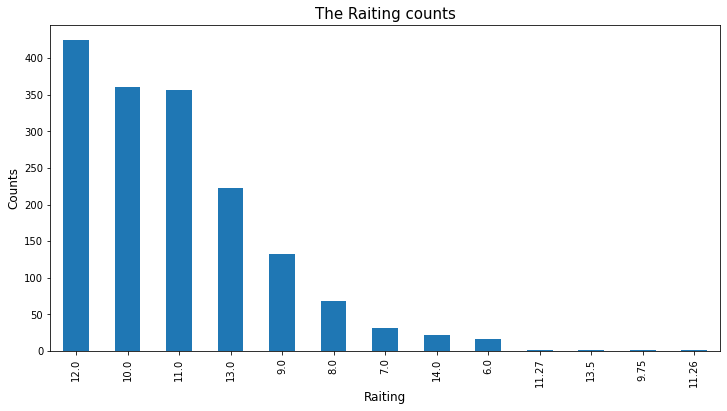

In [329]:
df_analyze.rating_numerator.value_counts().plot(kind = 'bar', figsize = (12,6));
plt.title('The Raiting counts', fontsize = 15)
plt.xlabel('Raiting', fontsize = 12);
plt.ylabel('Counts', fontsize = 12);

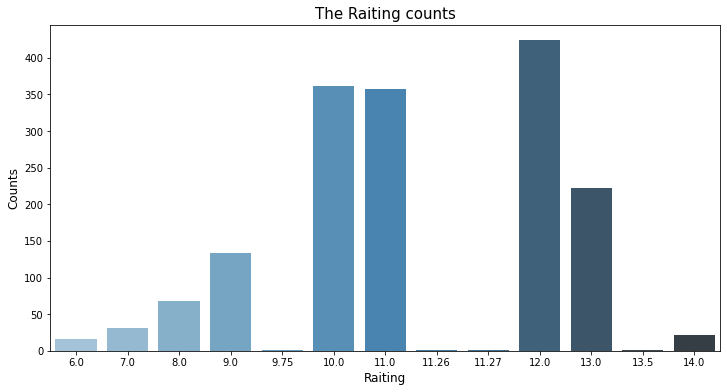

In [330]:
data = df_analyze.rating_numerator.value_counts()
x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
plt.title('The Raiting counts', fontsize = 15)
plt.xlabel('Raiting', fontsize = 12);
plt.ylabel('Counts', fontsize = 12);

> We conclude that most rating are 12/10 and rating with less than 6 and greater than 15 are ignored.

- Result of percentages between column Dog Stage values

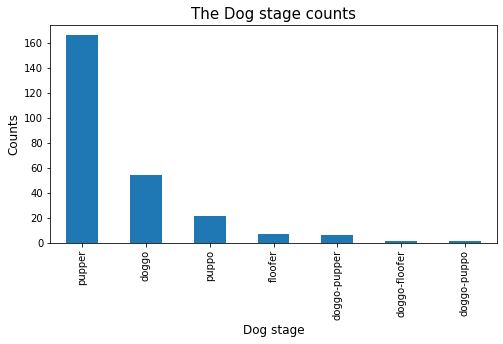

In [331]:
df_analyze.dog_stage.value_counts().plot(kind = 'bar', figsize = (8,4));
plt.title('The Dog stage counts', fontsize = 15)
plt.xlabel('Dog stage', fontsize = 12);
plt.ylabel('Counts', fontsize = 12);

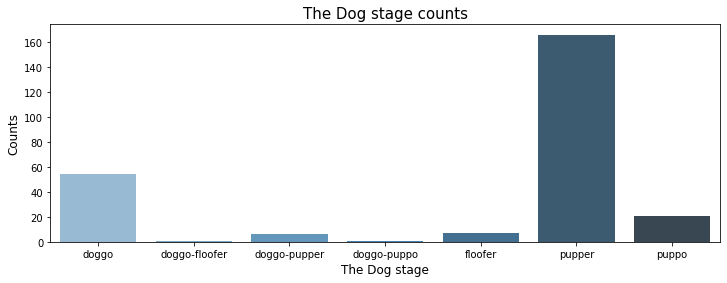

In [332]:
data = df_analyze.groupby('dog_stage').count()['tweet_id']
x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 4))
z = sns.barplot(x, y, palette='Blues_d', ax=ax)
plt.title('The Dog stage counts', fontsize = 15)
plt.xlabel('The Dog stage', fontsize = 12);
plt.ylabel('Counts', fontsize = 12);

# OR
#data = df_analyze.groupby('dog_stage').count()['tweet_id']
#ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
#ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
#plt.show()

> We will conclude that the most common stage of dogs is the pupper, and the least common stage for dogs is the doggo-floofer and doggo-popper.

- Relationship between Retweet  and Favorite Count

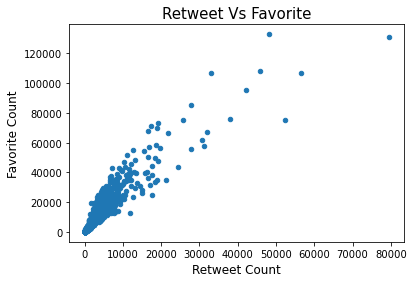

In [333]:
df_analyze.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter');
plt.title('Retweet Vs Favorite', fontsize = 15)
plt.xlabel('Retweet Count', fontsize = 12);
plt.ylabel('Favorite Count', fontsize = 12);

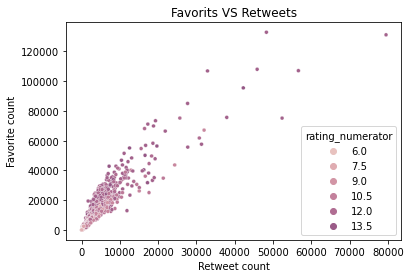

In [334]:
# Scatter plot to show the relation between favorits and retweets

ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_analyze, hue='rating_numerator', hue_norm=(5, 20), s=15) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets');

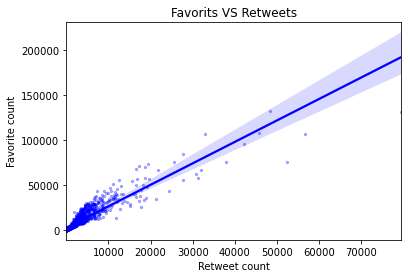

In [335]:
ax = sns.regplot(x='retweet_count', y='favorite_count', data=df_analyze, color='b', scatter_kws={'s':5, 'alpha':.3}) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets');

> We will conclude that their home has a positive relationship and that re-tweets are the favorite.
>> So, favorites and re-tweets are positively correlated. 

- Relationship between Timestamp and Raiting

In [336]:
# 1-Make an extra copy of your data
df_x = df_analyze.copy()

In [337]:
# 2-Set the time stamp column as the index of the dataframe, (definitely after making it of type datatime)
df_x.index = df_x['timestamp']

In [338]:
# 3-Drop the column that is now used as an index, as it won’t be of benefit anymore
df_x.drop(columns='timestamp',  inplace=True)

In [339]:
# 4-Sort the index
df_x.sort_index(inplace=True)

# Convert it to a datetime, if it does not convert
#df_p.index = pd.to_datetime(df_p.index)

In [340]:
# 5-Grouping according to the time frame i use
data_to_plot = df_x.groupby([(df_p.index.year),(df_p.index.month)]).rating_numerator.mean()

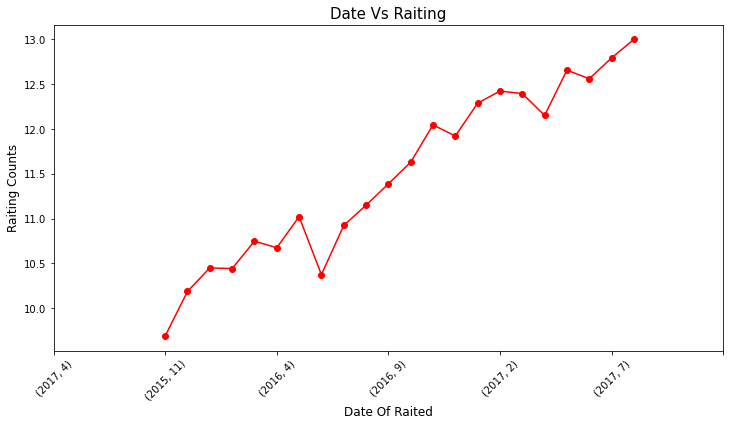

In [341]:
# 6-plot data
data_to_plot.plot(style = '-ro', figsize = (12,6),label = 'Total average rating')
#plt.axhline(y = 10.0, color = 'b', linestyle = '--', label = 'Out of rating')

plt.title('Date Vs Raiting', fontsize = 15 )
plt.xlabel('Date Of Raited', fontsize = 12)
plt.ylabel('Raiting Counts', fontsize = 12)

locs, labels = plt.xticks()
plt.xticks(locs, rotation=45);

> We will find that the ratings increase with time, the interaction increases and increases, indicating that in the next months and two years, it will continue to increase. 

> Therefore, for the sake of continued interaction and increased reactions, it is preferable that all tweets be clean and contain pictures of dogs only so that the followers are not distracted and few reviews are obtained. 

 

- Relationship between Timestamp and Retweet Count

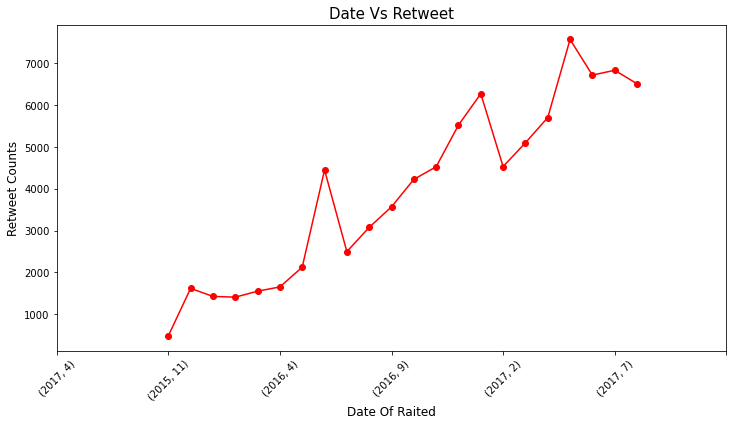

In [342]:
data_to_plot_2 = df_x.groupby([(df_x.index.year),(df_p.index.month)]).retweet_count.mean()
data_to_plot_2.plot(style = '-ro', figsize = (12,6),label = 'Total average Retweet Counts')

plt.title('Date Vs Retweet', fontsize = 15)
plt.xlabel('Date Of Raited', fontsize = 12)
plt.ylabel('Retweet Counts', fontsize = 12)

locs, labels = plt.xticks()
plt.xticks(locs, rotation=45);

> We will find that the re-tweets increase with time, and the interaction of the original tweets increases, which indicates that the page interaction will increase and followers will increase. 

 

- Relationship between Timestamp and Favorite Count

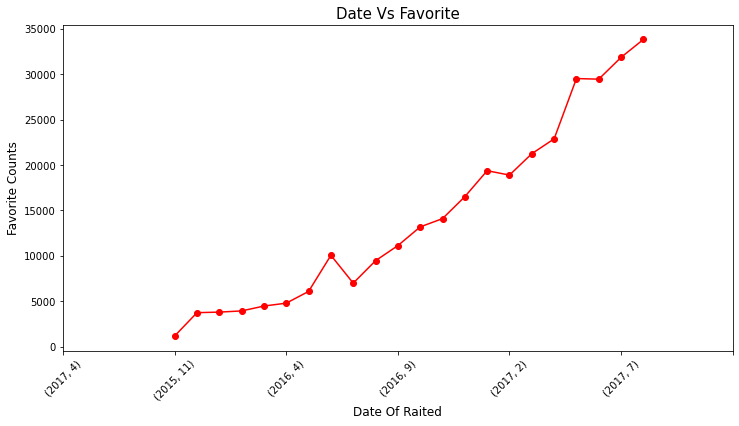

In [343]:
data_to_plot_3 = df_x.groupby([(df_x.index.year),(df_x.index.month)]).favorite_count.mean()
data_to_plot_3.plot(style = '-ro', figsize = (12,6),label = 'Total average Favorite Counts')

plt.title('Date Vs Favorite', fontsize = 15)
plt.xlabel('Date Of Raited', fontsize = 12)
plt.ylabel('Favorite Counts', fontsize = 12)

locs, labels = plt.xticks()
plt.xticks(locs, rotation=45);

> As we've explained before, re-tweets and Favorite are in a positive relationship. 

>> So, the favorites are definitely on the increase. 

# Thanks. 